# FROM 4OYD


## Question: Can we fold 3LHP and expect it to mimic the configuration of 4OYD?

In this scenario, we use __3LHP__ as template, and __4OYD__ as the source of our motif and binder and as the final target conformation we are aiming to mimic.

We will run the protocol with and without a binder. Using full CA constraints from the template (_fullcst_) or just constraints between residues belonging to the same secondary structure (_ssecst_).

We will first have a *no_design* run that entails only the __NubInitioMover__. This runs will generate poses that have to be considered as non-final, and, thus, should not be considered on their own without further processing.

After that, different design rules are tested:  

* __classicFFL:__ Rules are followed like in the original FFL. 3 Rounds of __FastDesign__ in which the binder (if any) and the motif are completely static.  
* __minimizeBinderAlternate:__ For 3 rounds, we will alternate __FastDesign__ with the classical _FFL rules_ with minimization of the _binder_. 


### Nomenclature:

* __Template:__ Structure that will accomodate the query motif.  
* __Design:__ Chain that we are designing; contains the query motif and is guided by the template info.  
* __Binder:__ If any, is whatever protein(s) bind to the query motif.  
* __Target:__ Protein that we expect our design to resemble to and to which we compare.  

In [2]:
%load_ext autoreload
%autoreload 2

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import rstoolbox
import pandas as pd
import seaborn as sns
import numpy as np
import copy

sns.set(font_scale=1.5);

In [30]:
def merge_rmsd_types( df, keys ):
    dataframes = []
    for k in keys["split"]:
        colIDs = copy.copy(keys["keep"])
        colIDs.append(k[0])
        wdf = df[colIDs]
        wdf = wdf.assign(temporarykey1=pd.Series([k[1]]*len(wdf[colIDs[0]])).values).copy(True)
        wdf = wdf.rename(index=str, columns={
            k[0]: keys["names"][0],
            "temporarykey1": keys["names"][1]
        })
        if ( len(k) > 2 ):
            wdf = wdf.assign(temporarykey2=pd.Series([k[2]]*len(wdf[colIDs[0]])).values).copy(True)
            wdf = wdf.rename(index=str, columns={
                "temporarykey2": keys["names"][2]
            })
        dataframes.append(wdf)
    return pd.concat(dataframes)

# classicFFL (ffl)

In [49]:
experiments = [
    ("classicFFL/binder/design_classicFFL_1_minisilent", "classicFFL/binder/ddg_evaluation.score"),
    ("classicFFL/nobinder/design_classicFFL_1_minisilent", "classicFFL/nobinder/ddg_evaluation.score")
]
definition = {
    "scores":{
        "description": "description", "design_score": "score",
        "GRMSD2Target": "GRMSD2Target",
        "LRMSD2Target": "LRMSD2Target", "LRMSDH2Target": "LRMSDH2Target", "LRMSDLH2Target": "LRMSDLH2Target"
    },
    "naming": ["", "", "binder", "", "cluster", "decoy", "experiment", "", "", ""]
}
ddg_definition = {
    "scores":{
        "description": "description", "ddg": "ddg", "post_ddg": "min_ddg", "rmsd_drift": "rmsd_drift"
    },
    "naming": ["", "", "binder", "", "cluster", "decoy", "experiment", "", "", "", ""]
}
logic = {
    "keep": ["description", "binder", "cluster", "decoy", "experiment", "ddg", "min_ddg", "score", "rmsd_drift"],
    "split": [("GRMSD2Target",  "global", "target"),  ("LRMSD2Target",   "local", "target"),
              ("LRMSDH2Target", "local",  "htarget"), ("LRMSDLH2Target", "local", "lhtarget")],
    "names": ["rmsd", "rmsd_alignment", "rmsd_to"]
}

In [50]:
dataframes = []
for experiment in experiments:
    dlist_main = rstoolbox.api.read_rosetta_silent(experiment[0])
    df_main    = rstoolbox.api.process_from_definitions(dlist_main, definition)
    dlist_ddg  = rstoolbox.api.read_rosetta_silent(experiment[1])
    df_ddg     = rstoolbox.api.process_from_definitions(dlist_ddg, ddg_definition)
    df_ddg     = df_ddg.drop("description", axis=1)
    df         = pd.merge(df_main, df_ddg, how='left', on=['cluster', 'decoy', 'experiment', 'binder'])
    dataframes.append(df)
ffl_data      = pd.concat(dataframes)
ffl_plot_data = merge_rmsd_types( ffl_data, logic )

In [51]:
ffl_data

,GRMSD2Target,LRMSD2Target,LRMSDH2Target,LRMSDLH2Target,binder,cluster,decoy,description,experiment,score,ddg,min_ddg
0,2.090,3.104,2.620,2.229,binder,573,0001,nodesign_3lhp_binder_1_573_0001_classicFFL_1_5...,classicFFL,-281.068,-44.071,-54.366
1,1.687,2.629,2.307,1.566,binder,573,0002,nodesign_3lhp_binder_1_573_0002_classicFFL_1_5...,classicFFL,-290.039,-45.765,-57.691
2,1.799,2.232,2.038,1.809,binder,573,0003,nodesign_3lhp_binder_1_573_0003_classicFFL_1_5...,classicFFL,-290.085,-42.074,-52.280
3,1.732,2.854,2.526,1.687,binder,573,0004,nodesign_3lhp_binder_1_573_0004_classicFFL_1_5...,classicFFL,-289.623,-44.234,-50.859
4,1.815,2.244,1.858,1.807,binder,573,0005,nodesign_3lhp_binder_1_573_0005_classicFFL_1_5...,classicFFL,-287.085,-41.556,-48.940
5,1.547,1.932,1.569,1.523,binder,573,0006,nodesign_3lhp_binder_1_573_0006_classicFFL_1_5...,classicFFL,-281.661,-40.428,-48.611
6,1.665,2.299,2.034,2.045,binder,573,0007,nodesign_3lhp_binder_1_573_0007_classicFFL_1_5...,classicFFL,-290.014,-40.690,-45.233
7,2.302,3.737,3.281,2.801,binder,573,0008,nodesign_3lhp_binder_1_573_0008_classicFFL_1_5...,classicFFL,-240.334,-42.480,-45.442
8,1.515,1.853,1.635,1.388,binder,573,0009,nodesign_3lhp_binder_1_573_0009_classicFFL_1_5...,classicFFL,-284.215,-40.079,-44.886
9,1.583,2.167,1.952,1.529,binder,573,0010,nodesign_3lhp_binder_1_573_0010_classicFFL_1_5...,classicFFL,-294.319,-42.447,-50.822


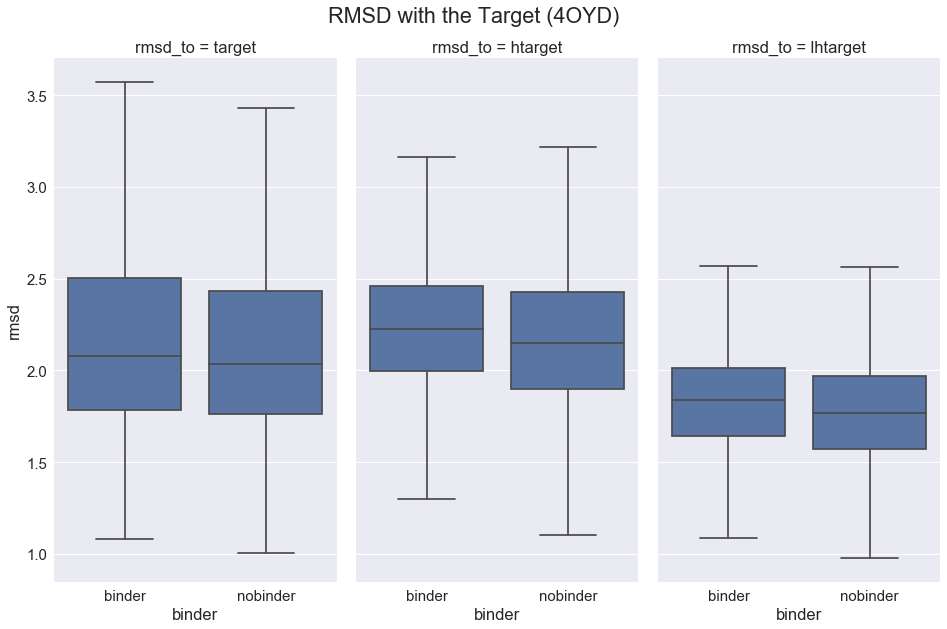

In [82]:
g = sns.FacetGrid(ffl_plot_data, col="rmsd_to", size=9, aspect=0.5)
(g.map(sns.boxplot, "binder", "rmsd", showfliers=False)
 .despine(left=True))
plt.subplots_adjust(top=0.9)
g.fig.suptitle('RMSD with the Target (4OYD)')
sns.plt.show()

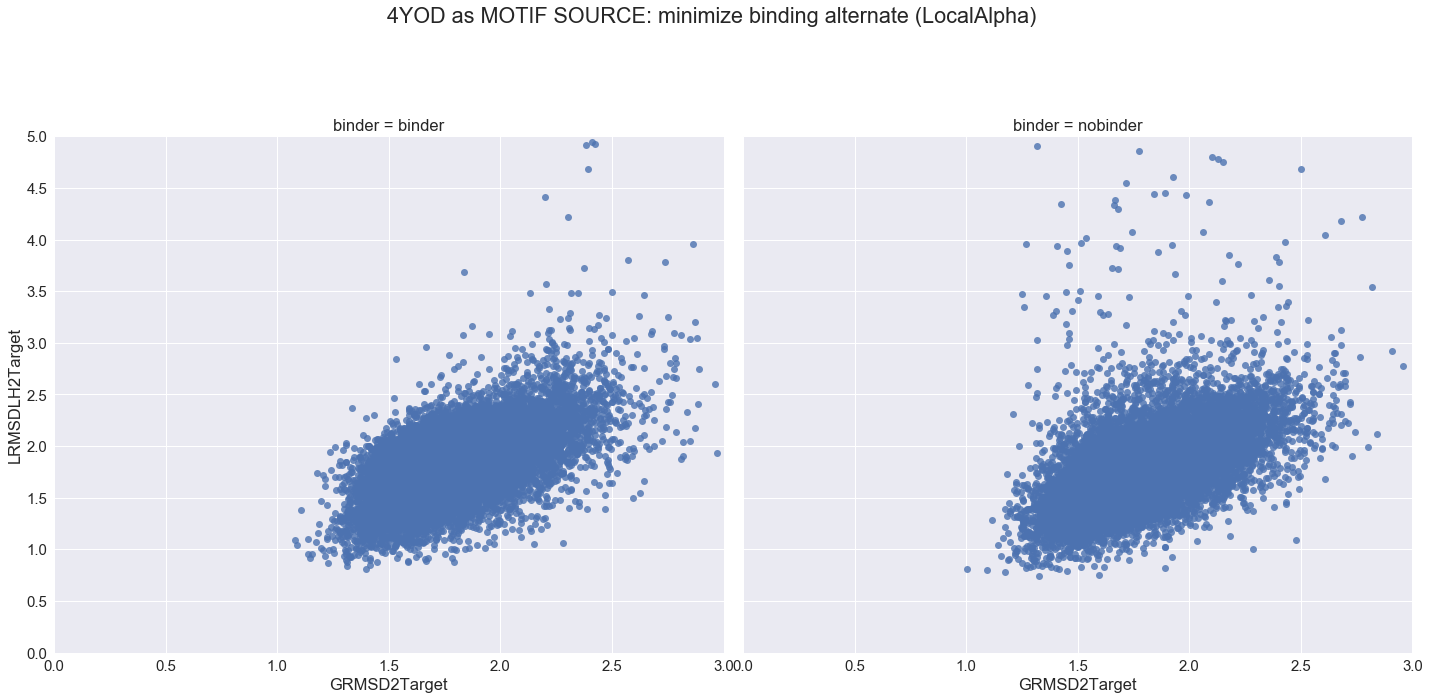

In [83]:
g = sns.lmplot(x="GRMSD2Target", y="LRMSDLH2Target", data=ffl_data, col="binder", fit_reg=False, size=10)
plt.subplots_adjust(top=0.80)
g.axes[0,0].set_ylim(0,5)
g.axes[0,0].set_xlim(0,3)
g.axes[0,0].set_yticks(np.arange(0,5.5,0.5))
g.fig.suptitle('4YOD as MOTIF SOURCE: minimize binding alternate (LocalAlpha)')
sns.plt.show()

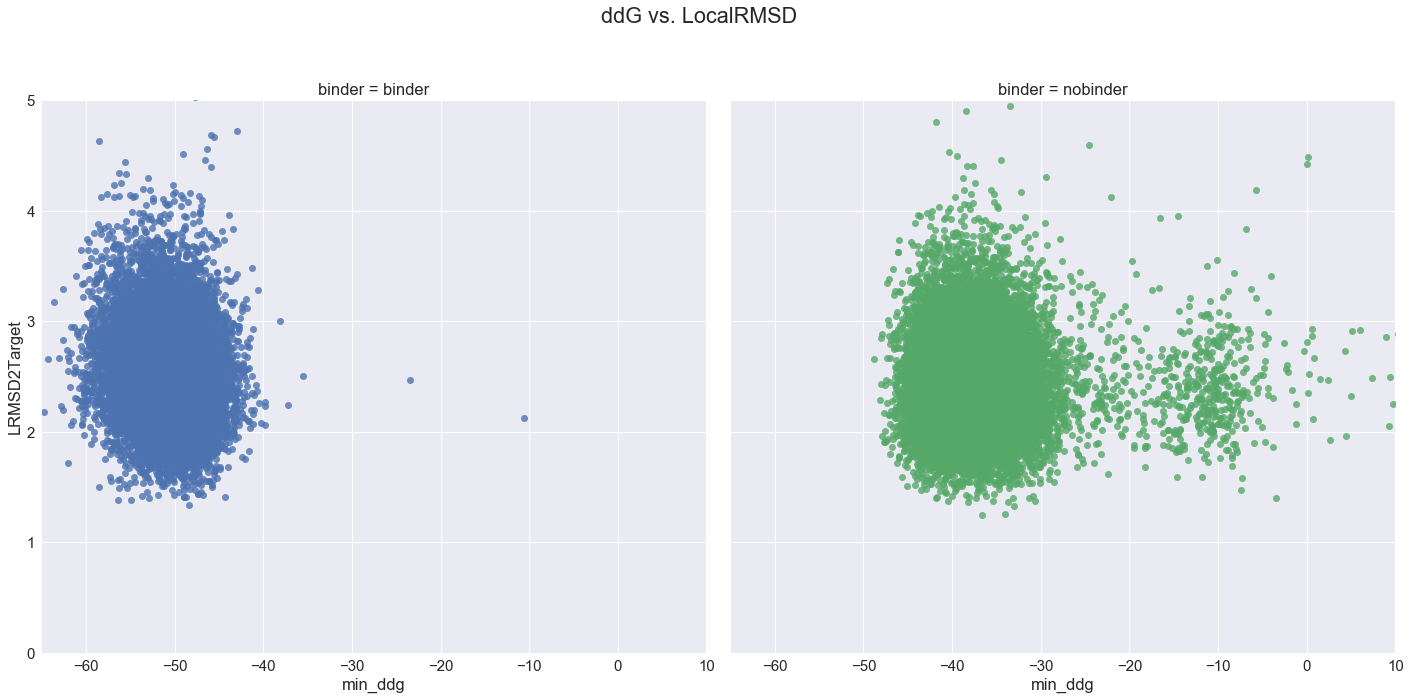

In [80]:
g = sns.lmplot(x="min_ddg", y="LRMSD2Target", col="binder", hue="binder", data=ffl_data, fit_reg=False, size=10)
plt.subplots_adjust(top=0.85)
g.axes[0,0].set_ylim(0, 5)
g.axes[0,0].set_xlim(-65,10)
g.fig.suptitle('ddG vs. LocalRMSD')
sns.plt.show()

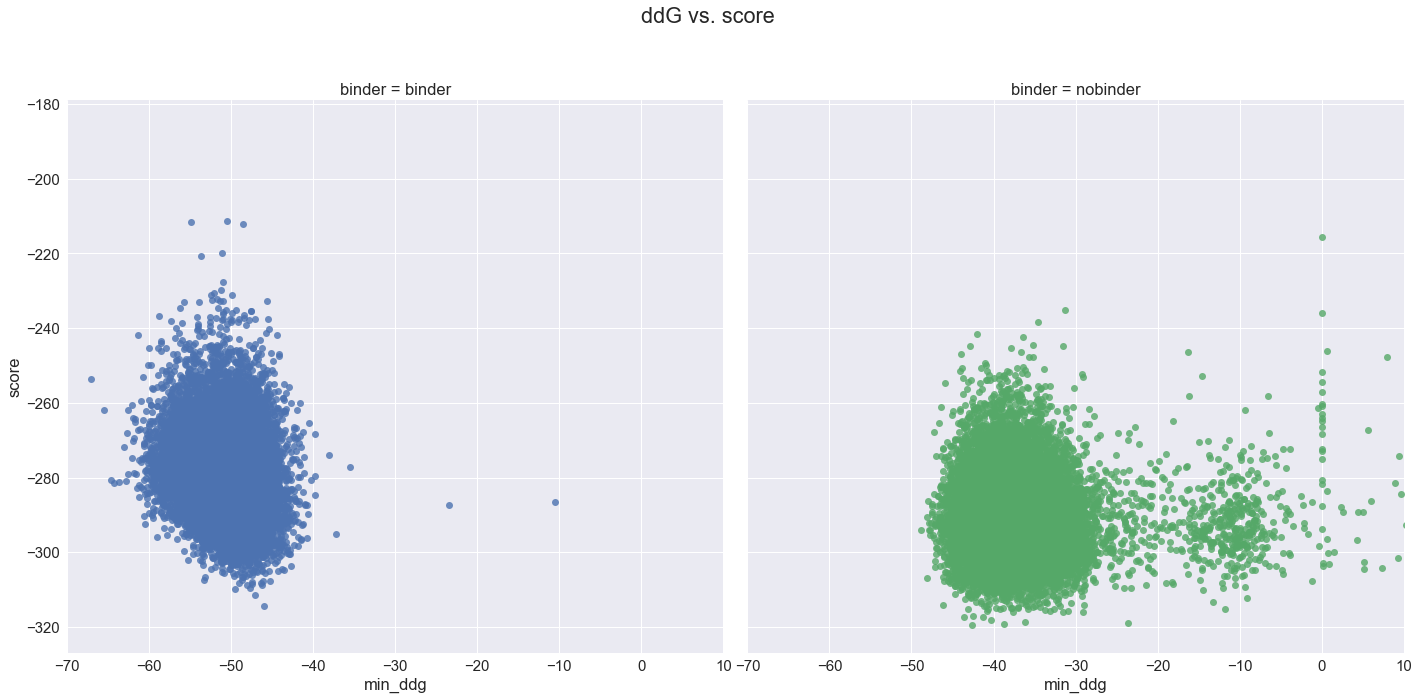

In [104]:
g = sns.lmplot(x="min_ddg", y="score", col="binder", hue="binder", data=ffl_data, fit_reg=False, size=10)
plt.subplots_adjust(top=0.85)
g.axes[0,0].set_xlim(-70,10)
g.fig.suptitle('ddG vs. score')
sns.plt.show()

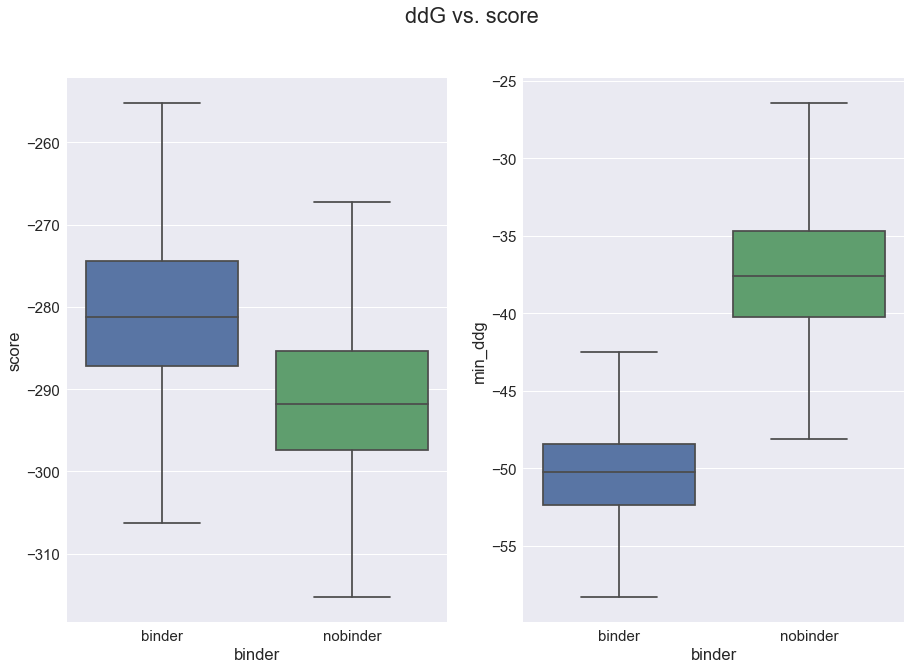

In [115]:
f, axes = plt.subplots(1, 2, figsize=(15, 10))
sns.boxplot(x="binder", y="score", data=ffl_data, showfliers=False, ax=axes[0])
sns.boxplot(x="binder", y="min_ddg", data=ffl_data, showfliers=False, ax=axes[1])
plt.suptitle('ddG vs. score')
#f.subplots_adjust(top=0.85)
#plt.fig.suptitle('ddG vs. score')
sns.plt.show()

# minimizeBinderAlternate (mba)

In [3]:
experiments = "minimizeBinderAlternate/output/design_minimizeBinderAlternate_1_minisilent"
definition = {
    "scores":{
        "description": "description", "design_score": "score",
        "GRMSD2Target": "GRMSD2Target",
        "LRMSD2Target": "LRMSD2Target", "LRMSDH2Target": "LRMSDH2Target", "LRMSDLH2Target": "LRMSDLH2Target"
    },
    "naming": ["", "", "", "", "cluster", "decoy", "experiment", "", "", ""]
}

In [4]:
dlist    = rstoolbox.api.read_rosetta_silent(experiments)
mba_data = rstoolbox.api.process_from_definitions(dlist, definition)
mba_data.loc[mba_data["experiment"] == "minimizeBinderAlternate", "experiment"] = "mba"

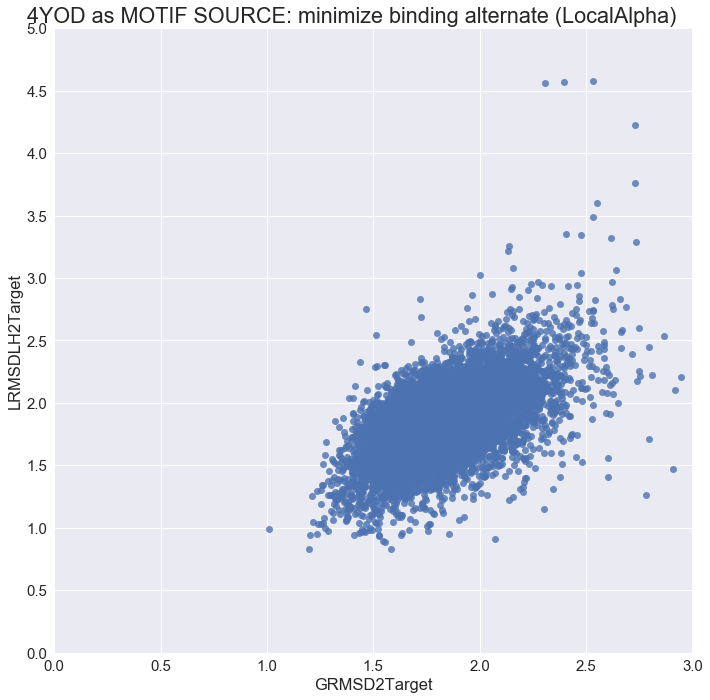

In [7]:
g = sns.lmplot(x="GRMSD2Target", y="LRMSDLH2Target", data=mba_data, fit_reg=False, size=10)
plt.subplots_adjust(top=0.95)
g.axes[0,0].set_ylim(0,5)
g.axes[0,0].set_xlim(0,3)
g.axes[0,0].set_yticks(np.arange(0,5.5,0.5))
g.fig.suptitle('4YOD as MOTIF SOURCE: minimize binding alternate (LocalAlpha)')
sns.plt.show()

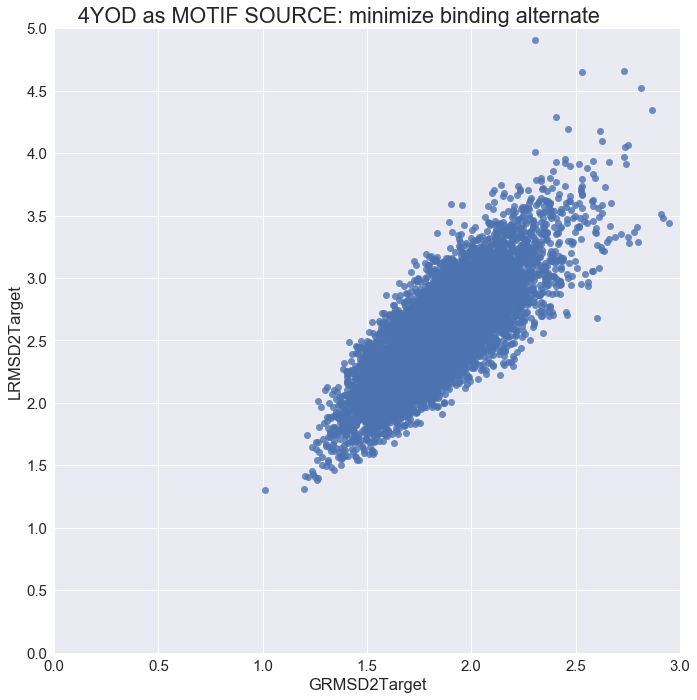

In [6]:
g = sns.lmplot(x="GRMSD2Target", y="LRMSD2Target", data=mba_data, fit_reg=False, size=10)
plt.subplots_adjust(top=0.95)
g.axes[0,0].set_ylim(0,5)
g.axes[0,0].set_xlim(0,3)
g.axes[0,0].set_yticks(np.arange(0,5.5,0.5))
g.fig.suptitle('4YOD as MOTIF SOURCE: minimize binding alternate')
sns.plt.show()